# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [29]:
import os
import pandas as pd
%matplotlib inline
import nltk
nltk.download('vader_lexicon')
from datetime import datetime


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/audreygutierrez/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [31]:
# Read your api key environment variable
news_api_key = os.getenv("NewsAPI")

In [32]:
# Create a newsapi client

from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=news_api_key)

In [33]:
letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(newsapi))

In [34]:
# Fetch the Bitcoin news articles

bitcoin_news_en = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

In [157]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="ethereum", language="en")

In [158]:
# Creating a function to collect news articles, create sentiment analysis and dataframe with everything in it
def news_dataframe(topic):
    news = newsapi.get_everything(q='{topic}',
                #sources='bbc-news,the-verge',
                domains='bbc.co.uk,techcrunch.com',
                from_param='2021-10-23',
                to='2021-11-23',
                language='en',
                sort_by='relevancy',
                page=2)

    
    articles = []
    for article in news['articles']:
        try:
            sentiment = sid.polarity_scores(article["description"])
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]
            
            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "compound": sentiment["compound"],
                "positive": sentiment["pos"],
                "negative": sentiment["neg"],
                "neutral": sentiment["neu"],
            })
        except AttributeError:
            pass
    
    return pd.DataFrame(articles)# Creating a function to collect news articles, create sentiment analysis and dataframe with everything in it

In [159]:
# Run function for ethereum and bitcoin
ethereum_articles = news_dataframe('ethereum')
bitcoin_articles = news_dataframe('bitcoin')

In [204]:
ethereum_articles.head()

,title,description,text,date,compound,positive,negative,neutral
0,"Divining the future of VC, saying goodbye to D...",It marks the final official podcast with our o...,Hello and welcome back to Equity.\r\nThis is a...,2021-10-27,-0.3182,0.000,0.078,0.922
1,"Match of the Day Top 10 podcast: Lineker, Shea...","Gary Lineker, Alan Shearer and Micah Richards ...",Some results stand out more than others - but ...,2021-11-10,-0.1779,0.071,0.099,0.830
2,"Match of the Day Top 10 podcast: Lineker, Shea...","Gary Lineker, Alan Shearer and Micah Richards ...",South American players have brought excitement...,2021-11-17,0.7184,0.200,0.000,0.800
3,Wall Street still doesn't get crypto,"Hello and welcome back to Equity, a podcast ab...","Hello and welcome back to Equity, a podcast ab...",2021-11-13,0.5093,0.121,0.000,0.879
4,"Match of the Day Top 10 podcast: Gary Lineker,...","Gary Lineker, Alan Shearer and Micah Richards ...",Some players are able to cope with the pressur...,2021-11-03,0.2023,0.079,0.000,0.921


In [160]:
bitcoin_articles.head()

,title,description,text,date,compound,positive,negative,neutral
0,"Divining the future of VC, saying goodbye to D...",It marks the final official podcast with our o...,Hello and welcome back to Equity.\r\nThis is a...,2021-10-27,-0.3182,0.000,0.078,0.922
1,"Match of the Day Top 10 podcast: Lineker, Shea...","Gary Lineker, Alan Shearer and Micah Richards ...",Some results stand out more than others - but ...,2021-11-10,-0.1779,0.071,0.099,0.830
2,"Match of the Day Top 10 podcast: Lineker, Shea...","Gary Lineker, Alan Shearer and Micah Richards ...",South American players have brought excitement...,2021-11-17,0.7184,0.200,0.000,0.800
3,Wall Street still doesn't get crypto,"Hello and welcome back to Equity, a podcast ab...","Hello and welcome back to Equity, a podcast ab...",2021-11-13,0.5093,0.121,0.000,0.879
4,"Match of the Day Top 10 podcast: Gary Lineker,...","Gary Lineker, Alan Shearer and Micah Richards ...",Some players are able to cope with the pressur...,2021-11-03,0.2023,0.079,0.000,0.921


In [161]:
# Describe the Bitcoin Sentiment
bitcoin_articles.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.074230,0.070300,0.056150,0.873550
std,0.396475,0.076491,0.111204,0.113045
min,-0.956500,0.000000,0.000000,0.529000
25%,-0.095400,0.000000,0.000000,0.824000
50%,0.000000,0.075000,0.000000,0.898000
75%,0.421500,0.103500,0.096000,0.927000
max,0.718400,0.286000,0.471000,1.000000


In [162]:
# Describe the Ethereum Sentiment
ethereum_articles.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.074230,0.070300,0.056150,0.873550
std,0.396475,0.076491,0.111204,0.113045
min,-0.956500,0.000000,0.000000,0.529000
25%,-0.095400,0.000000,0.000000,0.824000
50%,0.000000,0.075000,0.000000,0.898000
75%,0.421500,0.103500,0.096000,0.927000
max,0.718400,0.286000,0.471000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Etherium

Q: Which coin had the highest compound score?

A: Etherium

Q. Which coin had the highest positive score?

A: Etherium

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [163]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [164]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
nltk.download('stopwords')
sw = stopwords.words("english")

# Expand the default stopwords list if necessary
sw.append("seen")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/audreygutierrez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [165]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    text_clean = regex.sub(' ', text)    
   
    # Create a tokenized list of the words
    words = word_tokenize(text_clean)
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase    
    words = [word.lower() for word in words]
    
    # Remove the stop words
    words = [word for word in words if word not in sw]    
    
    return tokens

In [166]:
# Create a new tokens column for Bitcoin
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/audreygutierrez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/audreygutierrez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [167]:
#Create a new tokens column for ethereum
article = ethereum_articles["description"]
tokenizer(article)

TypeError: expected string or bytes-like object

In [28]:
# Create a new tokens column for Ethereum
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)

bitcoin_df.head()

NameError: name 'bitcoin_df' is not defined

In [169]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

def word_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [172]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    # Combine all articles in corpus into one large string
    big_string = ' '.join(tokens)
    processed = process_text(big_string)
    top = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top.items()), columns=['word', 'count'])

In [168]:
from collections import Counter
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd
lemmatizer = WordNetLemmatizer()

In [170]:
# Generate the Bitcoin N-grams where N=2
corpus = bitcoin_articles["description"]
bigram_counter(corpus)

,bigram,count
0,"(gary, lineker)",3
1,"(lineker, alan)",3
2,"(alan, shearer)",3
3,"(shearer, micah)",3
4,"(micah, richards)",3
5,"(richards, discus)",3
6,"(premier, league)",3
7,"(latest, match)",3
8,"(match, day)",3
9,"(day, top)",3


In [ ]:
# Generate the Ethereum N-grams where N=2
corpus = ethereum_articles["description"]
bigram_counter(corpus)

In [ ]:
# Get the top 10 words for Bitcoin
tokens = bitcoin_articles["description"]
token_count(tokens, N=10)

In [ ]:
# Use token_count to get the top 10 words for Ethereum
# Get the top 10 words for Ethereum
tokens = ethereum_articles["description"]
token_count(tokens, N=10)

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [178]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
from nltk.corpus import stopwords
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [179]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/audreygutierrez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

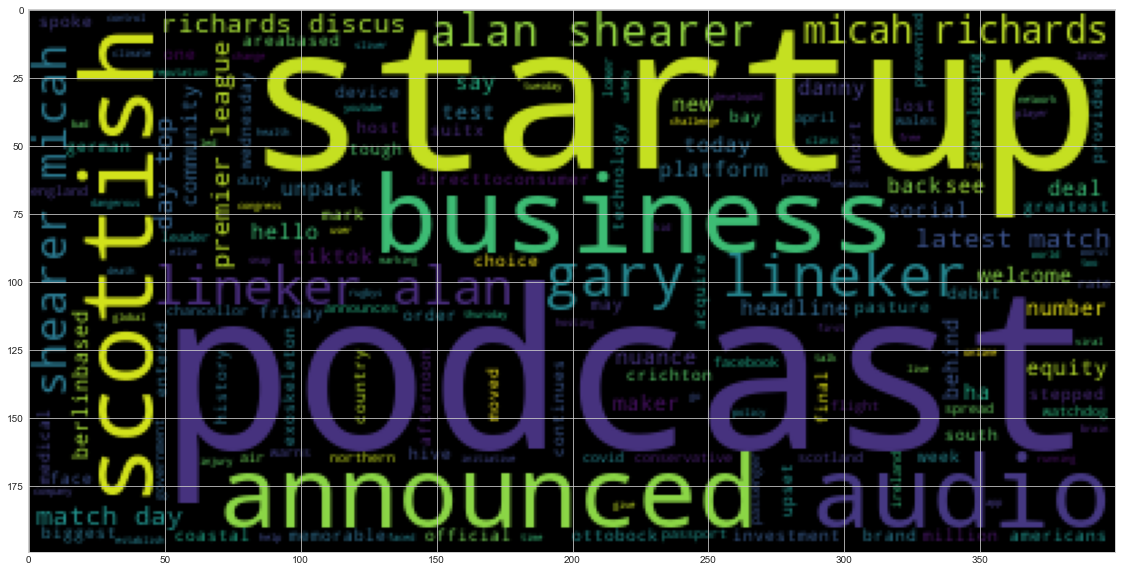

In [180]:
# Generate the Bitcoin word cloud
corpus = bitcoin_articles["description"]

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

big_string = ' '.join(corpus)
input_text = process_text(big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

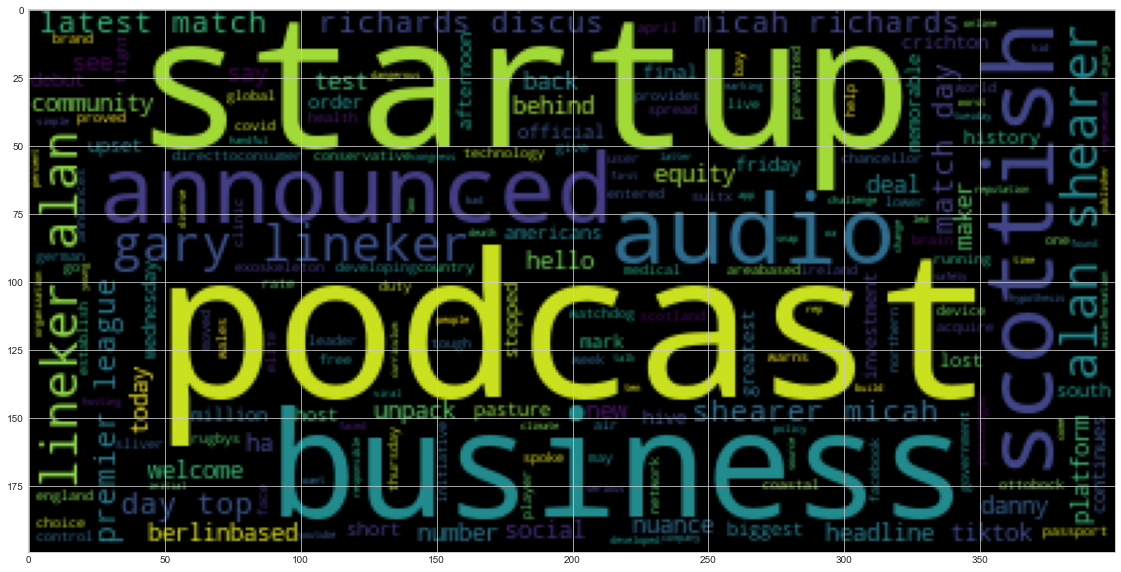

In [181]:
# Generate the Ethereum word cloud

corpus = ethereum_articles["description"]

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

big_string = ' '.join(corpus)
input_text = process_text(big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [182]:
import spacy
from spacy import displacy

In [183]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.1.0/en_core_web_sm-3.1.0-py3-none-any.whl (13.6 MB)
You should consider upgrading via the '/Users/audreygutierrez/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [184]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [187]:
# Concatenate all of the Bitcoin text together
bit_article = bitcoin_articles["description"].str.cat()


In [196]:
# Run the NER processor on all of the text
doc = nlp(bit_article)

# Add a title to the document
#bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [197]:
# Render the visualization
displacy.render(doc, style='ent')

In [198]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

['Berlin', 'Covid', 'England', 'Scotland', 'Wales', 'Northern Ireland', 'London', 'Attest', 'Berlin']


---

### Ethereum NER

In [199]:
# Concatenate all of the ethereum text together
eth_article = ethereum_articles["description"].str.cat()

In [200]:
# Run the NER processor on all of the text
doc = nlp(eth_article)

# Add a title to the document
#ethereum_doc.user_data["title"] = "Ethereum NER"

In [201]:
# Render the visualization
displacy.render(doc, style='ent')

In [202]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])



['Berlin', 'Covid', 'England', 'Scotland', 'Wales', 'Northern Ireland', 'London', 'Attest', 'Berlin']


---

In [203]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!